In [3]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.8 MB 3.9 MB/s eta 0:00:10
   - -------------------------------------- 1.1/38.8 MB 11.9 MB/s eta 0:00:04
   -- ------------------------------------- 2.1/38.8 MB 16.5 MB/s eta 0:00:03
   --- ------------------------------------ 3.4/38.8 MB 19.9 MB/s eta 0:00:02
   ---- ----------------------------------- 4.3/38.8 MB 19.4 MB/s eta 0:00:02
   ----- ---------------------------------- 5.0/38.8 MB 18.8 MB/s eta 0:00:02
   ------ --------------------------------- 6.4/38.8 MB 20.4 MB/s eta 0:00:02
   -------- ------------------------------- 7.9/38.8 MB 21.0 MB/s eta 0:00:02
   --------- ------------------------------ 9.7/38.8 MB 22.9 MB/s eta 0:00:02
   ----------- ---------------------------- 11.1/38.8 MB 25.2 MB/s eta 0:00:02
   ------------ --------------------------- 11.9/38.8 MB 25.2 MB/s eta 0:00:02
   ------------- -------------------------- 13.4/38.8 MB 25.2 MB/s eta 

In [8]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import imghdr

In [7]:
gpus = tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [9]:
data_dir = 'data'
img_ext = ['jpeg','jgp','png','bmp']

In [23]:
os.listdir(os.path.join(data_dir, 'happy'))

['05-12-21-happy-people.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '1687d86811a2c25b877448ed47218131.jpg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile-svg_.png',
 '35438_hd.jpg',
 '360_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg',
 '360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '383627315.jpg',
 '4239f3d51d092f69d529f372a37b4601.jpg',
 '427394C200000578-0-image-a-24_1500384481554.jpg',
 '5400ea_cd54b25fdd2a4216819fe49413f0c976-mv2.png',
 '7-principles-of-successful-and-happy-people.png',
 '71hBPTAhIXL-_AC_UF1000-1000_QL80_.jpg',
 '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg',
 '960x0.jpg',
 'aa-happy-people.jpg',
 'aecd7b04-bb40-42ad-9985-d63a3198a878.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Senior-citizens-on-holiday-22143350.jpg',
 'business-people-succesful-celebrating-group-successful-39416.jpg',
 'businesswoman-giving-high-five

In [25]:
os.path.join(data_dir, 'happy','05-12-21-happy-people.jpg')

'data\\happy\\05-12-21-happy-people.jpg'

(880, 1400, 3)


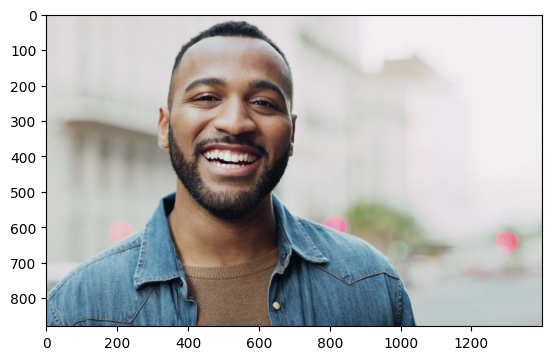

In [31]:
#show sample image
image = cv2.imread('data\\happy\\05-12-21-happy-people.jpg') 
print(image.shape)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [32]:
for image_label in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_label)):
        image_path = os.path.join(data_dir, image_label, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_ext:
                print('image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('issue with image{}'.format(image_path))

image not in ext list data\happy\427394C200000578-0-image-a-24_1500384481554.jpg
image not in ext list data\happy\businesswoman-giving-high-five-male-260nw-2226244055.jpg
image not in ext list data\happy\guilherme-stecanella-375176-unsplash.jpg
image not in ext list data\happy\istock-508455188-033183f45ba393ed4745b2dd1213c390.jpg
image not in ext list data\happy\jumping_for_joy_for_3_kinds_of_happy_people.jpg
image not in ext list data\happy\smiling-woman_W6GFOSFAXA.jpg
image not in ext list data\happy\traitshappypeople.jpg
image not in ext list data\happy\young-woman-curly-hair-laughing-260nw-1687578475.jpg
image not in ext list data\sad\640px-Sépulcre_Arc-en-Barrois_111008_12.jpg
image not in ext list data\sad\732x549_THUMBNAIL_8-signs-summer-sad.jpg
image not in ext list data\sad\98061648.jpg
image not in ext list data\sad\AdobeStock_221688877-copy.jpg
image not in ext list data\sad\depositphotos_36254119-stock-photo-desperate-sad-people.jpg
image not in ext list data\sad\depressed-

In [33]:
print(len(os.listdir(os.path.join(data_dir, 'happy'))))
print(len(os.listdir(os.path.join(data_dir, 'sad'))))

214
190


# load data

In [34]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [36]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [35]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 403 files belonging to 2 classes.


In [49]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [50]:
# images in numpy arrays (batches, size, size, rgb) (0: happy, 1: sad)
batch[0].shape

(32, 256, 256, 3)

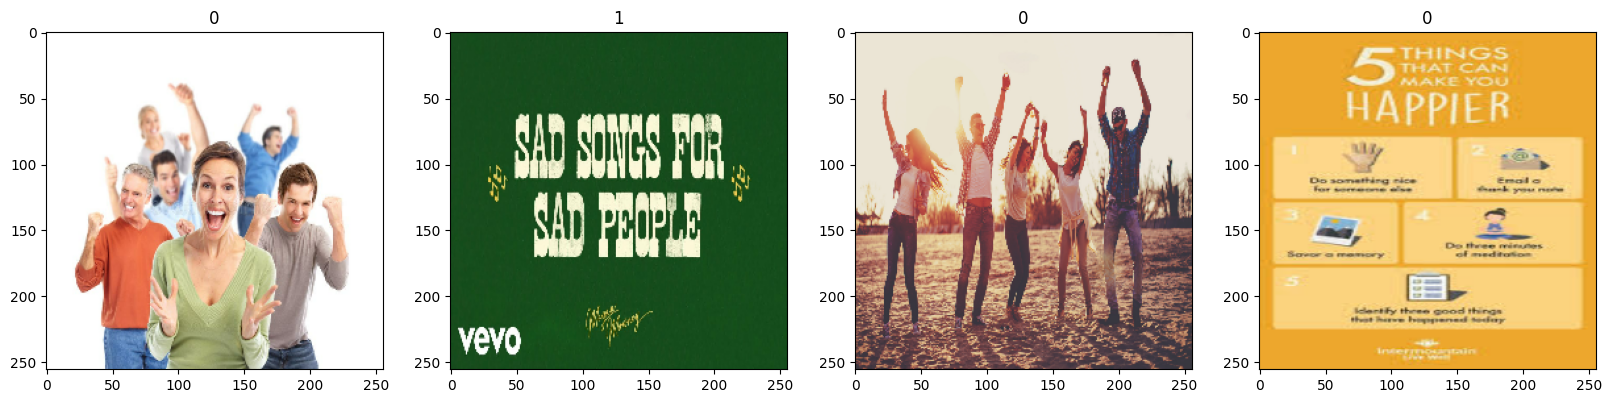

In [51]:
fig, ax = plt.subplots(1,4, figsize = (20,20))
for i, img in enumerate(batch[0][:4]):
    ax[i].imshow(img.astype(int))
    ax[i].title.set_text(batch[1][i])

# data preprocess

In [55]:
batch[0].max()

255.0

In [56]:
scaled_data = data.map(lambda x,y: (x/255, y))

In [60]:
scaled_iter = scaled_data.as_numpy_iterator()

In [61]:
scaled_batch = scaled_iter.next()

In [66]:
scaled_batch[0].min()

0.0

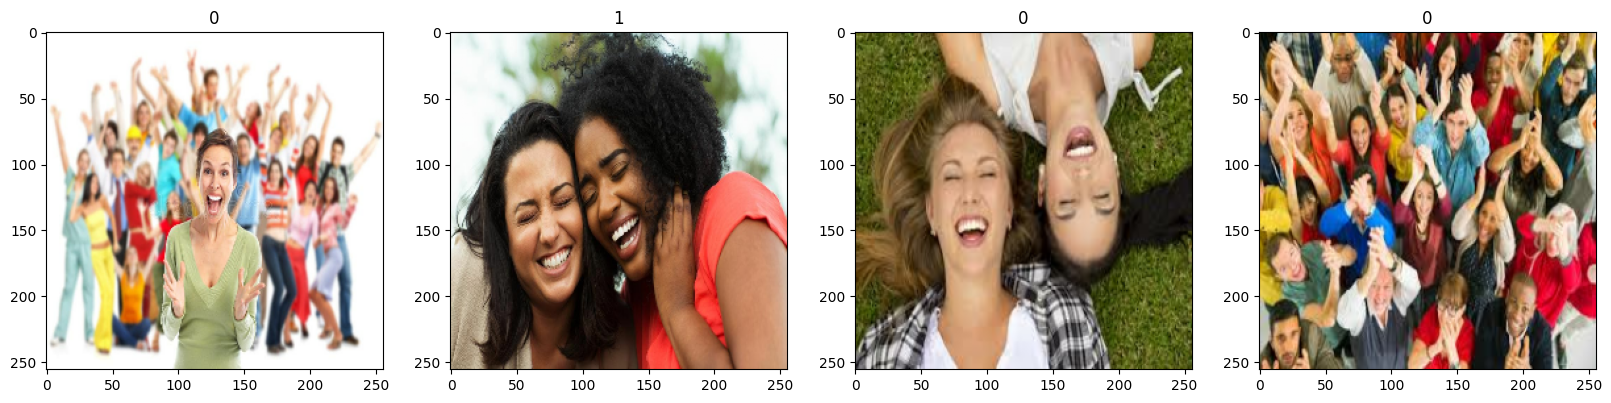

In [64]:
fig, ax = plt.subplots(1,4, figsize = (20,20))
for i, img in enumerate(scaled_batch[0][:4]):
    ax[i].imshow(img)
    ax[i].title.set_text(batch[1][i])